<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#train_data---feature" data-toc-modified-id="train_data---feature-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>train_data - feature</a></span></li><li><span><a href="#train_data---first_active_month" data-toc-modified-id="train_data---first_active_month-2.0.0.2"><span class="toc-item-num">2.0.0.2&nbsp;&nbsp;</span>train_data - first_active_month</a></span></li><li><span><a href="#train_data---target" data-toc-modified-id="train_data---target-2.0.0.3"><span class="toc-item-num">2.0.0.3&nbsp;&nbsp;</span>train_data - target</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature engineering</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#create-feature---'month_diff'" data-toc-modified-id="create-feature---'month_diff'-3.0.0.1"><span class="toc-item-num">3.0.0.1&nbsp;&nbsp;</span>create feature - 'month_diff'</a></span></li><li><span><a href="#binarize-'authorized_flag'-&amp;-'category_1'" data-toc-modified-id="binarize-'authorized_flag'-&amp;-'category_1'-3.0.0.2"><span class="toc-item-num">3.0.0.2&nbsp;&nbsp;</span>binarize 'authorized_flag' &amp; 'category_1'</a></span></li><li><span><a href="#dummy-'category_2'-&amp;-'category_3'" data-toc-modified-id="dummy-'category_2'-&amp;-'category_3'-3.0.0.3"><span class="toc-item-num">3.0.0.3&nbsp;&nbsp;</span>dummy 'category_2' &amp; 'category_3'</a></span></li><li><span><a href="#calculate-authorized_flag-mean-for-each-card_id" data-toc-modified-id="calculate-authorized_flag-mean-for-each-card_id-3.0.0.4"><span class="toc-item-num">3.0.0.4&nbsp;&nbsp;</span>calculate authorized_flag mean for each card_id</a></span></li><li><span><a href="#split-authorized_flag-and-no_anthorized_flag-from-historical_transaction" data-toc-modified-id="split-authorized_flag-and-no_anthorized_flag-from-historical_transaction-3.0.0.5"><span class="toc-item-num">3.0.0.5&nbsp;&nbsp;</span>split authorized_flag and no_anthorized_flag from historical_transaction</a></span></li><li><span><a href="#create-feature---'purchase_month'" data-toc-modified-id="create-feature---'purchase_month'-3.0.0.6"><span class="toc-item-num">3.0.0.6&nbsp;&nbsp;</span>create feature - 'purchase_month'</a></span></li><li><span><a href="#chage-purchase_date-from-datetime-to-second-based" data-toc-modified-id="chage-purchase_date-from-datetime-to-second-based-3.0.0.7"><span class="toc-item-num">3.0.0.7&nbsp;&nbsp;</span>chage purchase_date from datetime to second-based</a></span></li><li><span><a href="#aggregate-some-feautres-on-card_id" data-toc-modified-id="aggregate-some-feautres-on-card_id-3.0.0.8"><span class="toc-item-num">3.0.0.8&nbsp;&nbsp;</span>aggregate some feautres on card_id</a></span></li><li><span><a href="#calculate-the-count-of-transactions-for-each-card_id" data-toc-modified-id="calculate-the-count-of-transactions-for-each-card_id-3.0.0.9"><span class="toc-item-num">3.0.0.9&nbsp;&nbsp;</span>calculate the count of transactions for each card_id</a></span></li><li><span><a href="#aggregate-per-month" data-toc-modified-id="aggregate-per-month-3.0.0.10"><span class="toc-item-num">3.0.0.10&nbsp;&nbsp;</span>aggregate per month</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Construct-train-data-&amp;-test-data" data-toc-modified-id="Construct-train-data-&amp;-test-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Construct train data &amp; test data</a></span></li><li><span><a href="#Load-constructed-data" data-toc-modified-id="Load-constructed-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Load constructed data</a></span></li><li><span><a href="#feature-importance" data-toc-modified-id="feature-importance-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>feature importance</a></span></li><li><span><a href="#Hyperparameters-tuning" data-toc-modified-id="Hyperparameters-tuning-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Hyperparameters tuning</a></span></li><li><span><a href="#Training-model---LightBGM" data-toc-modified-id="Training-model---LightBGM-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Training model - LightBGM</a></span></li><li><span><a href="#Training-model" data-toc-modified-id="Training-model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Training model</a></span></li><li><span><a href="#Test-set-prediction" data-toc-modified-id="Test-set-prediction-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Test set prediction</a></span></li></ul></div>

In [117]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import gc
from catboost import CatBoostRegressor, Pool, cv
from lightgbm import LGBMRegressor
import datetime
from bayes_opt import BayesianOptimization
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
import warnings
warnings.filterwarnings("ignore")

# Load data

In [31]:
train_data = pd.read_csv('./train.csv', parse_dates=['first_active_month'])
train_data['elapsed_time'] =\
(datetime.date(2018, 2, 1) - train_data['first_active_month'].dt.date).dt.days

In [32]:
historical_transaction = pd.read_csv('./historical_transactions.csv', parse_dates=['purchase_date'])

In [33]:
new_transaction = pd.read_csv('./new_merchant_transactions.csv', parse_dates=['purchase_date'])

In [34]:
train_data.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-06-01  C_ID_92a2005557          5          2          1   
1         2017-01-01  C_ID_3d0044924f          4          1          0   
2         2016-08-01  C_ID_d639edf6cd          2          2          0   
3         2017-09-01  C_ID_186d6a6901          4          3          0   
4         2017-11-01  C_ID_cdbd2c0db2          1          3          0   

     target  elapsed_time  
0 -0.820283           245  
1  0.392913           396  
2  0.688056           549  
3  0.142495           153  
4 -0.159749            92

In [35]:
historical_transaction.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_4e6213e9bc       88          N             0   
1               Y  C_ID_4e6213e9bc       88          N             0   
2               Y  C_ID_4e6213e9bc       88          N             0   
3               Y  C_ID_4e6213e9bc       88          N             0   
4               Y  C_ID_4e6213e9bc       88          N             0   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          A                    80  M_ID_e020e9b302         -8   
1          A                   367  M_ID_86ec983688         -7   
2          A                    80  M_ID_979ed661fc         -6   
3          A                   560  M_ID_e6d5ae8ea6         -5   
4          A                    80  M_ID_e020e9b302        -11   

   purchase_amount       purchase_date  category_2  state_id  subsector_id  
0        -0.703331 2017-06-25 15:33:07         1.0        16            37  
1        -0.733128 2017-07-15 12:10:45         1.0        16            16  
2        -0.720386 2017-08-09 22:04:29         1.0        16            37  
3        -0.735352 2017-09-02 10:06:26         1.0        16            34  
4        -0.722865 2017-03-10 01:14:19         1.0        16            37

In [36]:
new_transaction.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_415bb3a509      107          N             1   
1               Y  C_ID_415bb3a509      140          N             1   
2               Y  C_ID_415bb3a509      330          N             1   
3               Y  C_ID_415bb3a509       -1          Y             1   
4               Y  C_ID_ef55cf8d4b       -1          Y             1   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          B                   307  M_ID_b0c793002c          1   
1          B                   307  M_ID_88920c89e8          1   
2          B                   507  M_ID_ad5237ef6b          2   
3          B                   661  M_ID_9e84cda3b1          1   
4          B                   166  M_ID_3c86fa3831          1   

   purchase_amount       purchase_date  category_2  state_id  subsector_id  
0        -0.557574 2018-03-11 14:57:36         1.0         9            19  
1        -0.569580 2018-03-19 18:53:37         1.0         9            19  
2        -0.551037 2018-04-26 14:08:44         1.0         9            14  
3        -0.671925 2018-03-07 09:43:21         NaN        -1             8  
4        -0.659904 2018-03-22 21:07:53         NaN        -1            29

# EDA

#### train_data - feature

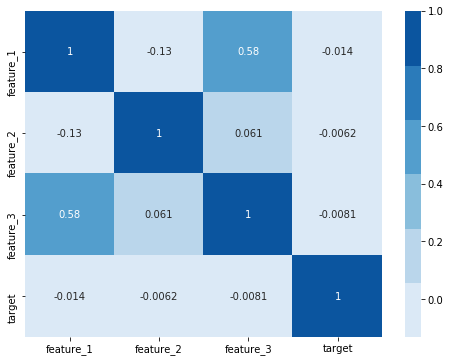

In [37]:
corr = train_data[['feature_1', 'feature_2', 'feature_3', 'target']].corr()
plt.figure(figsize=(8,6))
_ = sns.heatmap(corr, cmap=sns.color_palette("Blues"), cbar=True, annot=True)

`
Commemt:
    As can be seen there, the three basic features: feauure-1 feature-2 and feature-3 they do not have strong/significant correlation with each other, so we will keep all of them as input features.
`

#### train_data - first_active_month

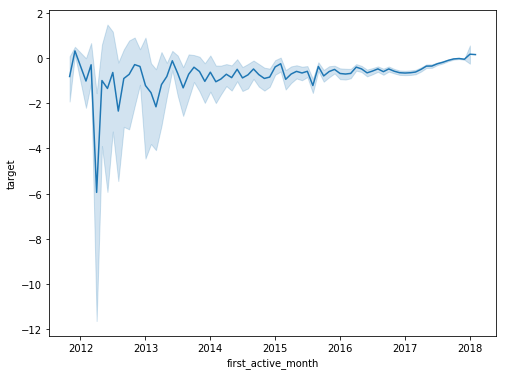

In [38]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(8,6))
_ = sns.lineplot(data=train_data, x='first_active_month', y='target')

`
Comment:
    In this figure we can see that, the first_active_month feature do not contribute to the target value, except of in a  short span of period (2012-04 ~ 2013-06), but in this time span, the variance of target value is relatively too high to conclude that first_active_month contributes to the target value. So, we regard the first_active_month feature as unimportant feature.
`

#### train_data - target

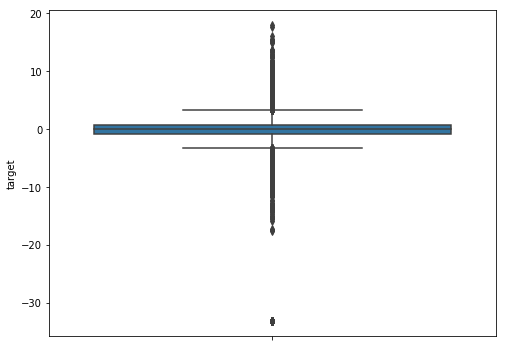

In [39]:
plt.figure(figsize=(8,6))
_ = sns.boxplot(x=train_data['target'], orient='v')

# Feature engineering

#### create feature - 'month_diff'

In [40]:
historical_transaction['month_diff'] =\
((datetime.datetime.today() - historical_transaction['purchase_date']).dt.days)//30
historical_transaction['month_diff'] += historical_transaction['month_lag']

new_transaction['month_diff'] =\
((datetime.datetime.today() - historical_transaction['purchase_date']).dt.days)//30 
new_transaction['month_diff'] += new_transaction['month_lag']

#### binarize 'authorized_flag' & 'category_1'

In [41]:
historical_transaction['authorized_flag'] =\
historical_transaction['authorized_flag'].map({'Y' :1,'N':0})
historical_transaction['category_1'] =\
historical_transaction['category_1'].map({'N': 1, 'Y': 0})

new_transaction['authorized_flag'] =\
new_transaction['authorized_flag'].map({'N': 1, 'Y':0})
new_transaction['category_1'] =\
new_transaction['category_1'].map({'N': 1, 'Y': 0})

#### dummy 'category_2' & 'category_3'

In [42]:
historical_transaction =\
pd.get_dummies(data=historical_transaction, columns=['category_2', 'category_3'])
new_transaction =\
pd.get_dummies(data = new_transaction, columns = ['category_2','category_3'])

In [43]:
# historical_transaction[[feature for feature in historical_transaction.columns if 'category' in feature and 'mer' not in feature]].head()
# new_transaction[[feature for feature in historical_transaction.columns if 'category' in feature and 'mer' not in feature]].head()

#### calculate authorized_flag mean for each card_id

In [44]:
auth_mean = historical_transaction.groupby(['card_id']).agg({'authorized_flag': ['mean']})
auth_mean.columns = ['_'.join(col).strip() for col in auth_mean.columns.values]
auth_mean.reset_index(inplace=True)

In [45]:
auth_mean.head()

card_id  authorized_flag_mean
0  C_ID_00007093c1              0.765101
1  C_ID_0001238066              0.975610
2  C_ID_0001506ef0              0.939394
3  C_ID_0001793786              0.875000
4  C_ID_000183fdda              0.951389

#### split authorized_flag and no_anthorized_flag from historical_transaction

In [46]:
auth_trans = historical_transaction[historical_transaction['authorized_flag'] == 1]
non_auth_trans = historical_transaction[historical_transaction['authorized_flag'] == 0]

#### create feature - 'purchase_month' 

In [47]:
non_auth_trans['purchase_month'] = non_auth_trans['purchase_date'].dt.month
auth_trans['purchase_month'] = auth_trans['purchase_date'].dt.month
new_transaction['purchase_month'] = new_transaction['purchase_date'].dt.month

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### chage purchase_date from datetime to second-based

In [48]:
non_auth_trans.loc[:, 'purchase_date'] = pd.DatetimeIndex(data=non_auth_trans['purchase_date']).astype(np.int64) * 1e-9
auth_trans.loc[:, 'purchase_date'] = pd.DatetimeIndex(data=auth_trans['purchase_date']).astype(np.int64) * 1e-9
new_transaction.loc[:, 'purchase_date'] = pd.DatetimeIndex(data=new_transaction['purchase_date']).astype(np.int64) * 1e-9

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### aggregate some feautres on card_id

In [49]:
agg_func = {
    'category_1': ['sum', 'mean'],
    'category_2_1.0': ['mean'],
    'category_2_2.0': ['mean'],
    'category_2_3.0': ['mean'],
    'category_2_4.0': ['mean'],
    'category_2_5.0': ['mean'],
    'category_3_A': ['mean'],
    'category_3_B': ['mean'],
    'category_3_C': ['mean'],
    
    'merchant_id': ['nunique'],
    'merchant_category_id': ['nunique'],
    'state_id': ['nunique'],
    'city_id': ['nunique'],
    'subsector_id': ['nunique'],
    
    'purchase_amount': ['max','min','mean','std','sum'],
    'month_lag': ['mean','min','std', 'max'],
    'purchase_month': ['mean', 'max', 'min', 'std'],
    'purchase_date': [np.ptp, 'min', 'max'],
    'installments': ['max','min','mean','std','sum'],
    'month_diff': ['mean']
}

In [50]:
agg_history = non_auth_trans.groupby(['card_id']).agg(agg_func)
agg_history.columns = ['hist_' + '_'.join(col) for col in agg_history.columns.values]

agg_auth = auth_trans.groupby(['card_id']).agg(agg_func)
agg_auth.columns = ['auth_' + '_'.join(col) for col in agg_auth.columns.values]

agg_new = new_transaction.groupby(['card_id']).agg(agg_func)
agg_new.columns = ['new_' + '_'.join(col).strip() for col in agg_new.columns.values]

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [51]:
agg_history.head()

hist_category_3_A_mean  hist_purchase_amount_max  \
card_id                                                             
C_ID_00007093c1                0.000000                  1.507069   
C_ID_0001238066                0.000000                 -0.596643   
C_ID_0001506ef0                0.750000                 -0.708590   
C_ID_0001793786                0.814815                  1.236592   
C_ID_000183fdda                0.000000                  0.334099   

                 hist_purchase_amount_min  hist_purchase_amount_mean  \
card_id                                                                
C_ID_00007093c1                 -0.728876                  -0.411485   
C_ID_0001238066                 -0.596643                  -0.596643   
C_ID_0001506ef0                 -0.740491                  -0.726445   
C_ID_0001793786                 -0.745405                  -0.437976   
C_ID_000183fdda                 -0.714541                  -0.134483   

                 hist_purchase_amount_std  hist_purchase_amount_sum  \
card_id                                                               
C_ID_00007093c1                  0.430059                -14.401965   
C_ID_0001238066                  0.000000                 -1.789928   
C_ID_0001506ef0                  0.016203                 -2.905782   
C_ID_0001793786                  0.498150                -11.825339   
C_ID_000183fdda                  0.452741                 -0.941381   

                 hist_month_lag_mean  hist_month_lag_min  hist_month_lag_std  \
card_id                                                                        
C_ID_00007093c1            -6.028571                 -11            3.535415   
C_ID_0001238066            -1.333333                  -2            1.154701   
C_ID_0001506ef0            -2.500000                  -8            3.785939   
C_ID_0001793786            -3.518519                  -7            2.375684   
C_ID_000183fdda            -5.714286                  -6            0.755929   

                 hist_month_lag_max  ...  hist_purchase_month_max  \
card_id                              ...                            
C_ID_00007093c1                   0  ...                       12   
C_ID_0001238066                   0  ...                       12   
C_ID_0001506ef0                   0  ...                       12   
C_ID_0001793786                  -1  ...                        9   
C_ID_000183fdda                  -4  ...                       10   

                 hist_purchase_month_min  hist_purchase_month_std  \
card_id                                                             
C_ID_00007093c1                        1                 3.071419   
C_ID_0001238066                        2                 5.773503   
C_ID_0001506ef0                        2                 4.725816   
C_ID_0001793786                        3                 2.375684   
C_ID_000183fdda                        8                 0.755929   

                 hist_merchant_category_id_nunique  hist_category_3_C_mean  \
card_id                                                                      
C_ID_00007093c1                                  8                0.171429   
C_ID_0001238066                                  1                0.000000   
C_ID_0001506ef0                                  4                0.000000   
C_ID_0001793786                                 14                0.000000   
C_ID_000183fdda                                  4                0.571429   

                 hist_subsector_id_nunique  hist_city_id_nunique  \
card_id                                                            
C_ID_00007093c1                          7                     3   
C_ID_0001238066                          1                     2   
C_ID_0001506ef0                          4                     1   
C_ID_0001793786                         11                     8   
C_ID_000183fdda                          4    

In [52]:
agg_auth.head()

auth_category_3_A_mean  auth_purchase_amount_max  \
card_id                                                             
C_ID_00007093c1                     0.0                  1.206539   
C_ID_0001238066                     0.0                  0.768095   
C_ID_0001506ef0                     1.0                  1.493545   
C_ID_0001793786                     1.0                  4.554145   
C_ID_000183fdda                     0.0                  2.764788   

                 auth_purchase_amount_min  auth_purchase_amount_mean  \
card_id                                                                
C_ID_00007093c1                 -0.728876                  -0.547746   
C_ID_0001238066                 -0.734887                  -0.588811   
C_ID_0001506ef0                 -0.740491                  -0.511227   
C_ID_0001793786                 -0.737892                  -0.132067   
C_ID_000183fdda                 -0.737892                  -0.495595   

                 auth_purchase_amount_std  auth_purchase_amount_sum  \
card_id                                                               
C_ID_00007093c1                  0.237426                -62.443076   
C_ID_0001238066                  0.192614                -70.657273   
C_ID_0001506ef0                  0.484575                -31.696098   
C_ID_0001793786                  0.867916                -24.960674   
C_ID_000183fdda                  0.523760                -67.896557   

                 auth_month_lag_mean  auth_month_lag_min  auth_month_lag_std  \
card_id                                                                        
C_ID_00007093c1            -5.798246                 -12            3.441495   
C_ID_0001238066            -1.825000                  -5            1.294218   
C_ID_0001506ef0            -4.983871                 -13            4.248402   
C_ID_0001793786            -3.301587                  -9            2.301491   
C_ID_000183fdda            -2.284672                  -5            1.782055   

                 auth_month_lag_max  ...  auth_purchase_month_max  \
card_id                              ...                            
C_ID_00007093c1                   0  ...                       12   
C_ID_0001238066                   0  ...                       12   
C_ID_0001506ef0                   0  ...                       12   
C_ID_0001793786                   0  ...                       10   
C_ID_000183fdda                   0  ...                       12   

                 auth_purchase_month_min  auth_purchase_month_std  \
card_id                                                             
C_ID_00007093c1                        1                 3.371490   
C_ID_0001238066                        1                 4.895483   
C_ID_0001506ef0                        1                 4.538017   
C_ID_0001793786                        1                 2.301491   
C_ID_000183fdda                        1                 4.538289   

                 auth_merchant_category_id_nunique  auth_category_3_C_mean  \
card_id                                                                      
C_ID_00007093c1                                 18                0.157895   
C_ID_0001238066                                 29                0.266667   
C_ID_0001506ef0                                 19                0.000000   
C_ID_0001793786                                 45                0.000000   
C_ID_000183fdda                                 34                0.240876   

                 auth_subsector_id_nunique  auth_city_id_nunique  \
card_id                                                            
C_ID_00007093c1                         13                     4   
C_ID_0001238066                         17                    18   
C_ID_0001506ef0                         12                     3   
C_ID_0001793786                         22                     9   
C_ID_000183fdda                         20    

In [53]:
agg_new.head()

new_category_3_A_mean  new_purchase_amount_max  \
card_id                                                           
C_ID_00007093c1                    0.0                -0.656749   
C_ID_0001238066                    0.0                -0.078318   
C_ID_0001506ef0                    1.0                -0.715352   
C_ID_0001793786                    1.0                 3.129932   
C_ID_000183fdda                    0.0                -0.107680   

                 new_purchase_amount_min  new_purchase_amount_mean  \
card_id                                                              
C_ID_00007093c1                -0.671775                 -0.664262   
C_ID_0001238066                -0.740897                 -0.571156   
C_ID_0001506ef0                -0.732001                 -0.723677   
C_ID_0001793786                -0.737892                 -0.007407   
C_ID_000183fdda                -0.732332                 -0.599162   

                 new_purchase_amount_std  new_purchase_amount_sum  \
card_id                                                             
C_ID_00007093c1                 0.010625                -1.328524   
C_ID_0001238066                 0.173436               -14.850055   
C_ID_0001506ef0                 0.011773                -1.447354   
C_ID_0001793786                 0.947223                -0.229620   
C_ID_000183fdda                 0.182877                -6.590778   

                 new_month_lag_mean  new_month_lag_min  new_month_lag_std  \
card_id                                                                     
C_ID_00007093c1            2.000000                  2           0.000000   
C_ID_0001238066            1.346154                  1           0.485165   
C_ID_0001506ef0            1.000000                  1           0.000000   
C_ID_0001793786            1.322581                  1           0.475191   
C_ID_000183fdda            1.272727                  1           0.467099   

                 new_month_lag_max  ...  new_purchase_month_max  \
card_id                             ...                           
C_ID_00007093c1                  2  ...                       4   
C_ID_0001238066                  2  ...                       4   
C_ID_0001506ef0                  1  ...                       3   
C_ID_0001793786                  2  ...                      12   
C_ID_000183fdda                  2  ...                       4   

                 new_purchase_month_min  new_purchase_month_std  \
card_id                                                           
C_ID_00007093c1                       4                0.000000   
C_ID_0001238066                       3                0.485165   
C_ID_0001506ef0                       3                0.000000   
C_ID_0001793786                      11                0.475191   
C_ID_000183fdda                       3                0.467099   

                 new_merchant_category_id_nunique  new_category_3_C_mean  \
card_id                                                                    
C_ID_00007093c1                                 2               0.000000   
C_ID_0001238066                                15               0.153846   
C_ID_0001506ef0                                 2               0.000000   
C_ID_0001793786                                21               0.000000   
C_ID_000183fdda                                 9               0.363636   

                 new_subsector_id_nunique  new_city_id_nunique  \
card_id                                                          
C_ID_00007093c1                         2                    2   
C_ID_0001238066                         9                    8   
C_ID_0001506ef0                         2                    1   
C_ID_0001793786                        14                    7   
C_ID_000183fdda                         6                    2   

                 new_category_2_3.0_mean  new_state_id_nunique  \
card_id                       

#### calculate the count of transactions for each card_id

In [54]:
agg_history =\
agg_history.merge(right=non_auth_trans.groupby('card_id').size().reset_index(name='hist_transactions_count'), how='left', on='card_id')
agg_auth =\
agg_auth.merge(right=auth_trans.groupby('card_id').size().reset_index(name='auth_transactions_count'), how='left', on='card_id')
agg_new =\
agg_new.merge(right=new_transaction.groupby('card_id').size().reset_index(name='new_transactions_count'), how='left', on='card_id')

In [55]:
agg_history.head()

card_id  hist_category_3_A_mean  hist_purchase_amount_max  \
0  C_ID_00007093c1                0.000000                  1.507069   
1  C_ID_0001238066                0.000000                 -0.596643   
2  C_ID_0001506ef0                0.750000                 -0.708590   
3  C_ID_0001793786                0.814815                  1.236592   
4  C_ID_000183fdda                0.000000                  0.334099   

   hist_purchase_amount_min  hist_purchase_amount_mean  \
0                 -0.728876                  -0.411485   
1                 -0.596643                  -0.596643   
2                 -0.740491                  -0.726445   
3                 -0.745405                  -0.437976   
4                 -0.714541                  -0.134483   

   hist_purchase_amount_std  hist_purchase_amount_sum  hist_month_lag_mean  \
0                  0.430059                -14.401965            -6.028571   
1                  0.000000                 -1.789928            -1.333333   
2                  0.016203                 -2.905782            -2.500000   
3                  0.498150                -11.825339            -3.518519   
4                  0.452741                 -0.941381            -5.714286   

   hist_month_lag_min  hist_month_lag_std  ...  hist_purchase_month_min  \
0                 -11            3.535415  ...                        1   
1                  -2            1.154701  ...                        2   
2                  -8            3.785939  ...                        2   
3                  -7            2.375684  ...                        3   
4                  -6            0.755929  ...                        8   

   hist_purchase_month_std  hist_merchant_category_id_nunique  \
0                 3.071419                                  8   
1                 5.773503                                  1   
2                 4.725816                                  4   
3                 2.375684                                 14   
4                 0.755929                                  4   

   hist_category_3_C_mean  hist_subsector_id_nunique  hist_city_id_nunique  \
0                0.171429                          7                     3   
1                0.000000                          1                     2   
2                0.000000                          4                     1   
3                0.000000                         11                     8   
4                0.571429                          4                     1   

   hist_category_2_3.0_mean  hist_state_id_nunique  hist_category_2_2.0_mean  \
0                  0.885714                      2                  0.000000   
1                  0.000000                      2                  0.000000   
2                  1.000000                      1                  0.000000   
3                  0.111111                      4                  0.296296   
4                  1.000000                      1                  0.000000   

   hist_transactions_count  
0                       35  
1                        3  
2                        4  
3                       27  
4                        7  

[5 rows x 39 columns]

In [56]:
agg_auth.head()

card_id  auth_category_3_A_mean  auth_purchase_amount_max  \
0  C_ID_00007093c1                     0.0                  1.206539   
1  C_ID_0001238066                     0.0                  0.768095   
2  C_ID_0001506ef0                     1.0                  1.493545   
3  C_ID_0001793786                     1.0                  4.554145   
4  C_ID_000183fdda                     0.0                  2.764788   

   auth_purchase_amount_min  auth_purchase_amount_mean  \
0                 -0.728876                  -0.547746   
1                 -0.734887                  -0.588811   
2                 -0.740491                  -0.511227   
3                 -0.737892                  -0.132067   
4                 -0.737892                  -0.495595   

   auth_purchase_amount_std  auth_purchase_amount_sum  auth_month_lag_mean  \
0                  0.237426                -62.443076            -5.798246   
1                  0.192614                -70.657273            -1.825000   
2                  0.484575                -31.696098            -4.983871   
3                  0.867916                -24.960674            -3.301587   
4                  0.523760                -67.896557            -2.284672   

   auth_month_lag_min  auth_month_lag_std  ...  auth_purchase_month_min  \
0                 -12            3.441495  ...                        1   
1                  -5            1.294218  ...                        1   
2                 -13            4.248402  ...                        1   
3                  -9            2.301491  ...                        1   
4                  -5            1.782055  ...                        1   

   auth_purchase_month_std  auth_merchant_category_id_nunique  \
0                 3.371490                                 18   
1                 4.895483                                 29   
2                 4.538017                                 19   
3                 2.301491                                 45   
4                 4.538289                                 34   

   auth_category_3_C_mean  auth_subsector_id_nunique  auth_city_id_nunique  \
0                0.157895                         13                     4   
1                0.266667                         17                    18   
2                0.000000                         12                     3   
3                0.000000                         22                     9   
4                0.240876                         20                     9   

   auth_category_2_3.0_mean  auth_state_id_nunique  auth_category_2_2.0_mean  \
0                  0.780702                      3                  0.000000   
1                  0.000000                      6                  0.000000   
2                  0.967742                      2                  0.000000   
3                  0.063492                      4                  0.359788   
4                  0.905109                      7                  0.007299   

   auth_transactions_count  
0                      114  
1                      120  
2                       62  
3                      189  
4                      137  

[5 rows x 39 columns]

In [57]:
agg_new.head()

card_id  new_category_3_A_mean  new_purchase_amount_max  \
0  C_ID_00007093c1                    0.0                -0.656749   
1  C_ID_0001238066                    0.0                -0.078318   
2  C_ID_0001506ef0                    1.0                -0.715352   
3  C_ID_0001793786                    1.0                 3.129932   
4  C_ID_000183fdda                    0.0                -0.107680   

   new_purchase_amount_min  new_purchase_amount_mean  new_purchase_amount_std  \
0                -0.671775                 -0.664262                 0.010625   
1                -0.740897                 -0.571156                 0.173436   
2                -0.732001                 -0.723677                 0.011773   
3                -0.737892                 -0.007407                 0.947223   
4                -0.732332                 -0.599162                 0.182877   

   new_purchase_amount_sum  new_month_lag_mean  new_month_lag_min  \
0                -1.328524            2.000000                  2   
1               -14.850055            1.346154                  1   
2                -1.447354            1.000000                  1   
3                -0.229620            1.322581                  1   
4                -6.590778            1.272727                  1   

   new_month_lag_std  ...  new_purchase_month_min  new_purchase_month_std  \
0           0.000000  ...                       4                0.000000   
1           0.485165  ...                       3                0.485165   
2           0.000000  ...                       3                0.000000   
3           0.475191  ...                      11                0.475191   
4           0.467099  ...                       3                0.467099   

   new_merchant_category_id_nunique  new_category_3_C_mean  \
0                                 2               0.000000   
1                                15               0.153846   
2                                 2               0.000000   
3                                21               0.000000   
4                                 9               0.363636   

   new_subsector_id_nunique  new_city_id_nunique  new_category_2_3.0_mean  \
0                         2                    2                  0.50000   
1                         9                    8                  0.00000   
2                         2                    1                  1.00000   
3                        14                    7                  0.16129   
4                         6                    2                  1.00000   

   new_state_id_nunique  new_category_2_2.0_mean  new_transactions_count  
0                     2                 0.000000                       2  
1                     4                 0.000000                      26  
2                     1                 0.000000                       2  
3                     5                 0.258065                      31  
4                     2                 0.000000                      11  

[5 rows x 39 columns]

#### aggregate per month

In [58]:
mid_agg = {
    'purchase_amount': ['count', 'sum', 'mean', 'min', 'max', 'std'],
    'installments': ['count', 'sum', 'mean', 'min', 'max', 'std']
}

_ = non_auth_trans.groupby(['card_id', 'month_lag']).agg(mid_agg)
_.columns = ['_'.join(col).strip() for col in _.columns.values]
_.reset_index(inplace=True)
agg_month_history = _.groupby('card_id').agg(['mean', 'std'])
agg_month_history.columns =\
['hist_month_' + '_'.join(col).strip() for col in agg_month_history.columns.values]

_ = auth_trans.groupby(['card_id', 'month_lag']).agg(mid_agg)
_.columns = ['_'.join(col).strip() for col in _.columns.values]
_.reset_index(inplace=True)
agg_month_auth = _.groupby('card_id').agg(['mean', 'std'])
agg_month_auth.columns =\
['auth_month_' + '_'.join(col).strip() for col in agg_month_auth.columns.values]

_ = new_transaction.groupby(['card_id', 'month_lag']).agg(mid_agg)
_.columns = ['_'.join(col).strip() for col in _.columns.values]
_.reset_index(inplace=True)
agg_month_new = _.groupby('card_id').agg(['mean', 'std'])
agg_month_new.columns =\
['new_month_' + '_'.join(col).strip() for col in agg_month_new.columns.values]

In [59]:
agg_month_history.head()

hist_month_month_lag_mean  hist_month_month_lag_std  \
card_id                                                                
C_ID_00007093c1                  -5.500000                  3.605551   
C_ID_0001238066                  -1.000000                  1.414214   
C_ID_0001506ef0                  -3.333333                  4.163332   
C_ID_0001793786                  -3.833333                  2.316607   
C_ID_000183fdda                  -5.000000                  1.414214   

                 hist_month_installments_count_mean  \
card_id                                               
C_ID_00007093c1                            2.916667   
C_ID_0001238066                            1.500000   
C_ID_0001506ef0                            1.333333   
C_ID_0001793786                            4.500000   
C_ID_000183fdda                            3.500000   

                 hist_month_installments_count_std  \
card_id                                              
C_ID_00007093c1                           1.621354   
C_ID_0001238066                           0.707107   
C_ID_0001506ef0                           0.577350   
C_ID_0001793786                           1.974842   
C_ID_000183fdda                           3.535534   

                 hist_month_installments_sum_mean  \
card_id                                             
C_ID_00007093c1                          3.750000   
C_ID_0001238066                          1.500000   
C_ID_0001506ef0                          0.333333   
C_ID_0001793786                          0.833333   
C_ID_000183fdda                          9.500000   

                 hist_month_installments_sum_std  \
card_id                                            
C_ID_00007093c1                         3.107908   
C_ID_0001238066                         0.707107   
C_ID_0001506ef0                         0.577350   
C_ID_0001793786                         0.983192   
C_ID_000183fdda                        12.020815   

                 hist_month_installments_mean_mean  \
card_id                                              
C_ID_00007093c1                           1.176389   
C_ID_0001238066                           1.000000   
C_ID_0001506ef0                           0.166667   
C_ID_0001793786                           0.291667   
C_ID_000183fdda                           2.000000   

                 hist_month_installments_mean_std  \
card_id                                             
C_ID_00007093c1                          0.326634   
C_ID_0001238066                          0.000000   
C_ID_0001506ef0                          0.288675   
C_ID_0001793786                          0.400520   
C_ID_000183fdda                          1.414214   

                 hist_month_installments_min_mean  \
card_id                                             
C_ID_00007093c1                          1.000000   
C_ID_0001238066                          1.000000   
C_ID_0001506ef0                          0.000000   
C_ID_0001793786                          0.166667   
C_ID_000183fdda                          1.000000   

                 hist_month_installments_min_std  ...  \
card_id                                           ...   
C_ID_00007093c1                         0.000000  ...   
C_ID_0001238066                         0.000000  ...   
C_ID_0001506ef0                         0.000000  ...   
C_ID_0001793786                         0.408248  ...   
C_ID_000183fdda                         0.000000  ...   

                 hist_month_purchase_amount_sum_mean  \
card_id                                                
C_ID_00007093c1                            -1.200164   
C_ID_0001238066                            -0.894964   
C_ID_0001506ef0                            -0.968594   
C_ID_0001793786                            -1.970890   
C_ID_000183fdda                            -0.470690   

                 hist_month_purchase_amount_sum_std  \
card_id                                

In [60]:
agg_month_auth.head()

auth_month_month_lag_mean  auth_month_month_lag_std  \
card_id                                                                
C_ID_00007093c1                  -6.000000                  3.894440   
C_ID_0001238066                  -2.500000                  1.870829   
C_ID_0001506ef0                  -6.230769                  4.225988   
C_ID_0001793786                  -4.500000                  3.027650   
C_ID_000183fdda                  -2.500000                  1.870829   

                 auth_month_installments_count_mean  \
card_id                                               
C_ID_00007093c1                            8.769231   
C_ID_0001238066                           20.000000   
C_ID_0001506ef0                            4.769231   
C_ID_0001793786                           18.900000   
C_ID_000183fdda                           22.833333   

                 auth_month_installments_count_std  \
card_id                                              
C_ID_00007093c1                           3.539158   
C_ID_0001238066                          11.696153   
C_ID_0001506ef0                           4.342692   
C_ID_0001793786                          12.160501   
C_ID_000183fdda                           7.167054   

                 auth_month_installments_sum_mean  \
card_id                                             
C_ID_00007093c1                         11.307692   
C_ID_0001238066                         32.500000   
C_ID_0001506ef0                          0.000000   
C_ID_0001793786                          0.000000   
C_ID_000183fdda                         40.833333   

                 auth_month_installments_sum_std  \
card_id                                            
C_ID_00007093c1                         4.210792   
C_ID_0001238066                        24.501020   
C_ID_0001506ef0                         0.000000   
C_ID_0001793786                         0.000000   
C_ID_000183fdda                        14.048725   

                 auth_month_installments_mean_mean  \
card_id                                              
C_ID_00007093c1                           1.369646   
C_ID_0001238066                           1.652873   
C_ID_0001506ef0                           0.000000   
C_ID_0001793786                           0.000000   
C_ID_000183fdda                           1.834943   

                 auth_month_installments_mean_std  \
card_id                                             
C_ID_00007093c1                          0.423190   
C_ID_0001238066                          0.410539   
C_ID_0001506ef0                          0.000000   
C_ID_0001793786                          0.000000   
C_ID_000183fdda                          0.362557   

                 auth_month_installments_min_mean  \
card_id                                             
C_ID_00007093c1                          1.000000   
C_ID_0001238066                          0.666667   
C_ID_0001506ef0                          0.000000   
C_ID_0001793786                          0.000000   
C_ID_000183fdda                          0.333333   

                 auth_month_installments_min_std  ...  \
card_id                                           ...   
C_ID_00007093c1                         0.000000  ...   
C_ID_0001238066                         0.816497  ...   
C_ID_0001506ef0                         0.000000  ...   
C_ID_0001793786                         0.000000  ...   
C_ID_000183fdda                         1.032796  ...   

                 auth_month_purchase_amount_sum_mean  \
card_id                                                
C_ID_00007093c1                            -4.803314   
C_ID_0001238066                           -11.776212   
C_ID_0001506ef0                            -2.438161   
C_ID_0001793786                            -2.496067   
C_ID_000183fdda                           -11.316093   

                 auth_month_purchase_amount_sum_std  \
card_id                                

In [61]:
agg_month_new.head()

new_month_month_lag_mean  new_month_month_lag_std  \
card_id                                                              
C_ID_00007093c1                       2.0                      NaN   
C_ID_0001238066                       1.5                 0.707107   
C_ID_0001506ef0                       1.0                      NaN   
C_ID_0001793786                       1.5                 0.707107   
C_ID_000183fdda                       1.5                 0.707107   

                 new_month_installments_count_mean  \
card_id                                              
C_ID_00007093c1                                2.0   
C_ID_0001238066                               13.0   
C_ID_0001506ef0                                2.0   
C_ID_0001793786                               15.5   
C_ID_000183fdda                                5.5   

                 new_month_installments_count_std  \
card_id                                             
C_ID_00007093c1                               NaN   
C_ID_0001238066                          5.656854   
C_ID_0001506ef0                               NaN   
C_ID_0001793786                          7.778175   
C_ID_000183fdda                          3.535534   

                 new_month_installments_sum_mean  \
card_id                                            
C_ID_00007093c1                              2.0   
C_ID_0001238066                             21.0   
C_ID_0001506ef0                              0.0   
C_ID_0001793786                              0.0   
C_ID_000183fdda                              8.0   

                 new_month_installments_sum_std  \
card_id                                           
C_ID_00007093c1                             NaN   
C_ID_0001238066                        2.828427   
C_ID_0001506ef0                             NaN   
C_ID_0001793786                        0.000000   
C_ID_000183fdda                        9.899495   

                 new_month_installments_mean_mean  \
card_id                                             
C_ID_00007093c1                          1.000000   
C_ID_0001238066                          1.836601   
C_ID_0001506ef0                          0.000000   
C_ID_0001793786                          0.000000   
C_ID_000183fdda                          1.104167   

                 new_month_installments_mean_std  \
card_id                                            
C_ID_00007093c1                              NaN   
C_ID_0001238066                         1.016755   
C_ID_0001506ef0                              NaN   
C_ID_0001793786                         0.000000   
C_ID_000183fdda                         1.090123   

                 new_month_installments_min_mean  \
card_id                                            
C_ID_00007093c1                              1.0   
C_ID_0001238066                              0.0   
C_ID_0001506ef0                              0.0   
C_ID_0001793786                              0.0   
C_ID_000183fdda                              0.0   

                 new_month_installments_min_std  ...  \
card_id                                          ...   
C_ID_00007093c1                             NaN  ...   
C_ID_0001238066                        1.414214  ...   
C_ID_0001506ef0                             NaN  ...   
C_ID_0001793786                        0.000000  ...   
C_ID_000183fdda                        1.414214  ...   

                 new_month_purchase_amount_sum_mean  \
card_id                                               
C_ID_00007093c1                           -1.328524   
C_ID_0001238066                           -7.425028   
C_ID_0001506ef0                           -1.447354   
C_ID_0001793786                           -0.114810   
C_ID_000183fdda                           -3.295389   

                 new_month_purchase_amount_sum_std  \
card_id                                              
C_ID_00007093c1                                NaN   
C_ID_0001

---

# Construct train data & test data

In [62]:
X = train_data[['card_id', 'feature_1', 'feature_2', 'feature_3', 'elapsed_time']]

X = pd.merge(left=X, right=auth_mean, how='left', on='card_id', validate='one_to_one')

X = pd.merge(left=X, right=agg_history, how='left', on='card_id', validate="one_to_one")
X = pd.merge(left=X, right=agg_auth, how='left', on='card_id', validate="one_to_one")
X = pd.merge(left=X, right=agg_new, how='left', on='card_id', validate="one_to_one")

X = pd.merge(left=X, right=agg_month_history, how='left', on='card_id', validate="one_to_one")
X = pd.merge(left=X, right=agg_month_auth, how='left', on='card_id', validate="one_to_one")
X = pd.merge(left=X, right=agg_month_new, how='left', on='card_id', validate="one_to_one")

# X = X.drop(labels='card_id', axis=1)
y = train_data['target'].copy()
# save X to csv
X.to_pickle('X.pkl')
y.to_pickle('y.pkl')

In [63]:
del train_data, historical_transaction, new_transaction, agg_history, agg_new, agg_month_auth, agg_month_history, agg_month_new, auth_mean
gc.collect()

2299

Load data from pickle

In [68]:
print("Total number of features is: {:d}\n".format(len(X.columns.values)), np.array(sorted(X.columns.values)))

Total number of features is: 198
 ['auth_category_1_mean' 'auth_category_1_sum' 'auth_category_2_1.0_mean'
 'auth_category_2_2.0_mean' 'auth_category_2_3.0_mean'
 'auth_category_2_4.0_mean' 'auth_category_2_5.0_mean'
 'auth_category_3_A_mean' 'auth_category_3_B_mean'
 'auth_category_3_C_mean' 'auth_city_id_nunique' 'auth_installments_max'
 'auth_installments_mean' 'auth_installments_min' 'auth_installments_std'
 'auth_installments_sum' 'auth_merchant_category_id_nunique'
 'auth_merchant_id_nunique' 'auth_month_diff_mean'
 'auth_month_installments_count_mean' 'auth_month_installments_count_std'
 'auth_month_installments_max_mean' 'auth_month_installments_max_std'
 'auth_month_installments_mean_mean' 'auth_month_installments_mean_std'
 'auth_month_installments_min_mean' 'auth_month_installments_min_std'
 'auth_month_installments_std_mean' 'auth_month_installments_std_std'
 'auth_month_installments_sum_mean' 'auth_month_installments_sum_std'
 'auth_month_lag_max' 'auth_month_lag_mean' 'au

# Load constructed data

In [88]:
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("The number of training samples is: {:d}".format(X_train.shape[0]))
print("The number of testing samples is: {:d}".format(X_test.shape[0]))
print("The number of features is: {:d}".format(X_train.shape[1]))

The number of training samples is: 151437
The number of testing samples is: 50480
The number of features is: 198


# feature importance

In [3]:
import tensorflow as tf

In [4]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [4]:
np.random.seed(123)
importance_baseline_df = get_feature_importance(data=X_train,\
                                                target=y_train,\
                                                clf='lightgbm',\
                                                shuffle=False)
importance_baseline_df.sort_values(by='importance_gain', axis=0, ascending=False).head()
importance_baseline_df.to_pickle('importance_baseline_df.pkl')

In [22]:
co# loop 200 times to get most requency feature importance for each feature
importance_test_df = pd.DataFrame()
for epoch in range(200):
    _importance_df = get_feature_importance(data=X_train,\
                                                target=y_train,\
                                                shuffle=True)
    _importance_df['epoch'] = epoch
    importance_test_df = pd.concat([importance_test_df, _importance_df],\
                                   axis=0,\
                                   ignore_index=True)
    print('{:d}/100'.format(epoch + 1), flush=True)
importance_test_df.to_pickle('importance_test_df.pkl')

1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100
52/100
53/100
54/100
55/100
56/100
57/100
58/100
59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100
100/100
101/100
102/100
103/100
104/100
105/100
106/100
107/100
108/100
109/100
110/100
111/100
112/100
113/100
114/100
115/100
116/100
117/100
118/100
119/100
120/100
121/100
122/100
123/100
124/100
125/100
126/100
127/100
128/100
129/100
130/100
131/100
132/100
133/100
134/100
135/100
136/100
137/100
138/100
139/

In [5]:
# load feature_score
importance_test_df = pd.read_pickle('importance_test_df.pkl')
importance_baseline_df = pd.read_pickle('importance_baseline_df.pkl')

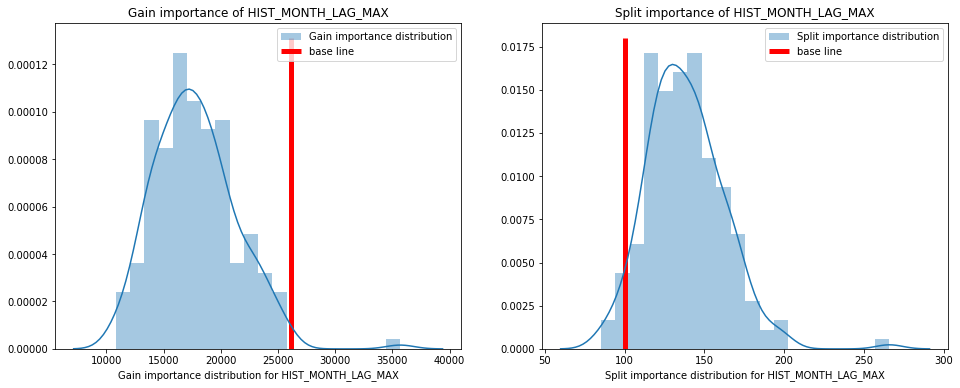

In [6]:
display_importance_dist(importance_test_df, importance_baseline_df, 'hist_month_lag_max')

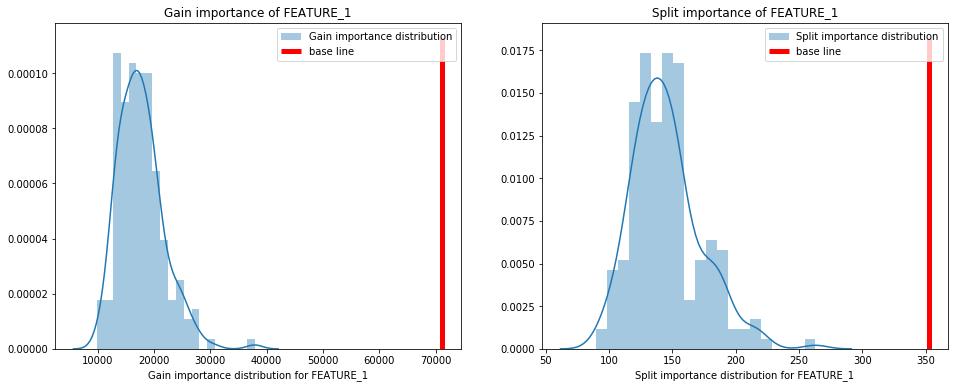

In [7]:
display_importance_dist(importance_test_df, importance_baseline_df, 'feature_1')

In [8]:
feature_score = []
for feature in importance_test_df['feature'].unique():
    importance_test_gain =\
    importance_test_df[importance_test_df['feature']==feature]['importance_gain'].values
    importance_baseline_gain =\
    importance_baseline_df[importance_baseline_df['feature']==feature]['importance_gain'].values
    gain_score = np.log(1e-10 + importance_baseline_gain / \
                        (1 + np.percentile(importance_test_gain, 75)))
    
    importance_test_split =\
    importance_test_df[importance_test_df['feature']==feature]['importance_split'].values
    importance_baseline_split =\
    importance_baseline_df[importance_baseline_df['feature']==feature]['importance_split'].values
    split_score = np.log(1e-10 + importance_baseline_split / \
                        (1 + np.percentile(importance_test_split, 75)))
    feature_score.append((feature, split_score[0], gain_score[0]))

In [9]:
feature_score

[('feature_1', 0.8038730239510892, 1.2844329578797913),
 ('feature_2', 0.6931471806099453, 1.3133013943764051),
 ('feature_3', 0.7368222441104701, 1.6395972399123195),
 ('elapsed_time', 0.7693085415718426, 1.4634296160786229),
 ('authorized_flag_mean', 0.5200085885474472, 1.639403724154689),
 ('hist_category_3_A_mean', 0.36772478019454813, 0.6572952245290492),
 ('hist_purchase_amount_max', -0.2187382577218428, 0.6826076215490771),
 ('hist_purchase_amount_min', 0.15477347917610942, 1.2105867199230829),
 ('hist_purchase_amount_mean', 0.009901071081726323, 0.710335635197921),
 ('hist_purchase_amount_std', -0.04721907183255566, 0.5658130934082036),
 ('hist_purchase_amount_sum', 0.36993367979875696, 1.755052794372703),
 ('hist_month_lag_mean', -0.07371757578891727, 0.6387028969756006),
 ('hist_month_lag_min', 0.2608348224926337, 1.3334925729451699),
 ('hist_month_lag_std', -0.005489492184221013, 0.9167321047530945),
 ('hist_month_lag_max', -0.42035372044966507, 0.26950694872756253),
 ('hist

In [10]:
feature_importance = []
for feature in importance_test_df['feature'].unique():
    
    # gain importance
    imoprtance_test_gain =\
    importance_test_df[importance_test_df['feature']==\
                       feature]['importance_gain'].values
    importance_baseline_gain =\
    importance_baseline_df[importance_baseline_df['feature']==\
                           feature]['importance_gain'].values
    gain_score = np.log(1e-10 + importance_baseline_gain/(1 + np.percentile(imoprtance_test_gain, 75)))
    
    # split importance
    importance_test_split =\
    importance_test_df[importance_test_df['feature']==\
                       feature]['importance_split'].values
    importance_baseline_split =\
    importance_baseline_df[importance_baseline_df['feature']==\
                       feature]['importance_split'].values
    split_score = np.log(1e-10 + importance_baseline_split/(1 + np.percentile(importance_test_split, 75)))
    
    # add to feature_imoprtance list
    feature_importance.append((feature, gain_score[0], split_score[0]))

feature_importance = pd.DataFrame(data=feature_importance, columns=['feature', 'gain_score', 'split_score'])
feature_importance.head()

feature  gain_score  split_score
0             feature_1    1.284433     0.803873
1             feature_2    1.313301     0.693147
2             feature_3    1.639597     0.736822
3          elapsed_time    1.463430     0.769309
4  authorized_flag_mean    1.639404     0.520009

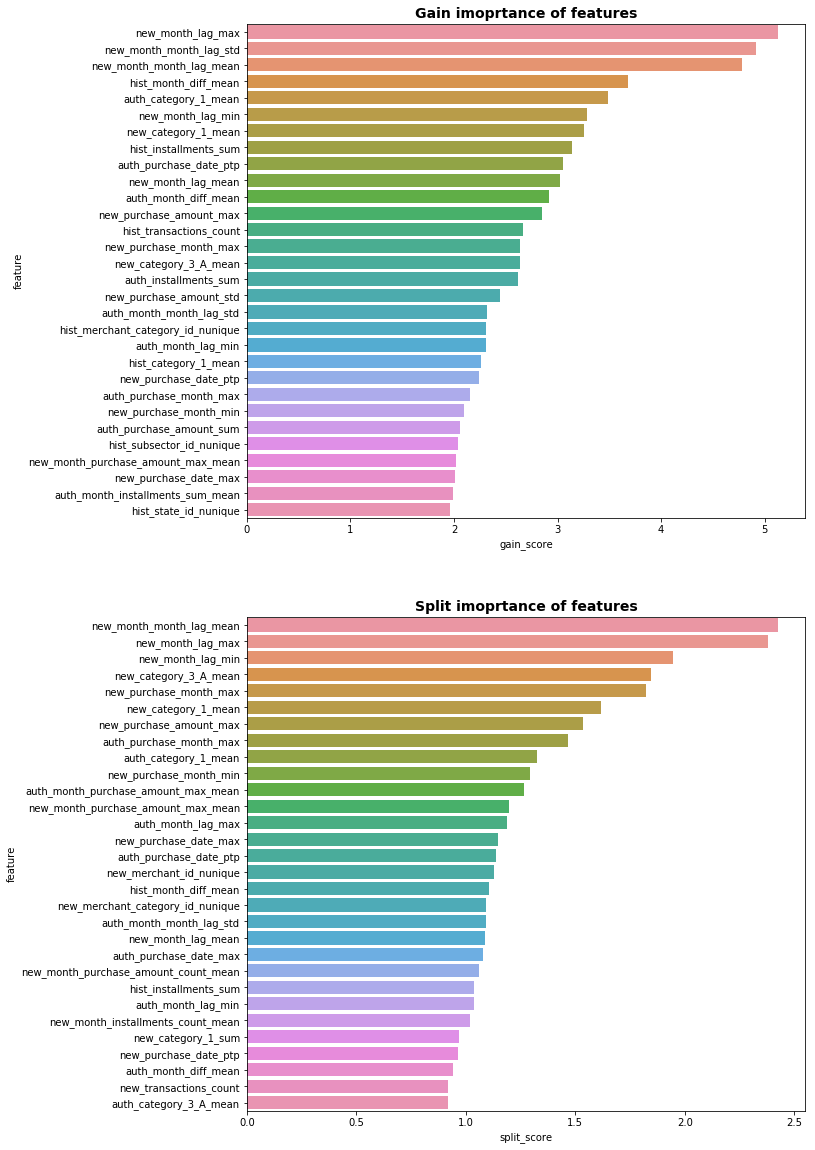

In [11]:
# visualize gain and split importance
num_feature = 30
plt.figure(figsize=(10, 20))
gs = plt.GridSpec(2, 1)

# gain importance
ax = plt.subplot(gs[0, 0])
sns.barplot(x='gain_score',\
            y='feature',\
            data=feature_importance.sort_values(by='gain_score', axis=0, ascending=False).iloc[:num_feature],\
            ax=ax)
_ = plt.title('Gain imoprtance of features',\
              fontdict={'fontweight':'bold', 'fontsize':14})

# split importance
ax = plt.subplot(gs[1, 0])
sns.barplot(x='split_score',\
            y='feature',\
            data=feature_importance.sort_values(by='split_score', axis=0, ascending=False).iloc[:num_feature],\
            ax=ax)
_ = plt.title('Split imoprtance of features',\
              fontdict={'fontweight':'bold', 'fontsize':14})

# Hyperparameters tuning

In [127]:
X_train = reduce_mem_usage(X_train)
X_test = reduce_mem_usage(X_test)

Mem. usage decreased to 63.83 Mb (0.0% reduction)
Mem. usage decreased to 20.51 Mb (0.0% reduction)


In [156]:
# define define the function to calculate cross-validation lightBGM function
# there we assume the variables are aready defined:
#             'X_train' is training X data
#             'y_train' is training y data
def LGB_CV(max_depth,\
           num_leaves,\
           min_data_in_leaf,\
           feature_fraction,\
           bagging_fraction,\
           lambda_l1,\
           n_splits=5):
    
    import lightgbm as lgb
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import KFold
    import numpy as np
    import gc
    
    features = [feature for feature in X_train.columns \
                if feature not in ['card_id', 'first_active_month']]
    categorical_features = [feature for feature in features \
                            if 'feature_' in feature]
    folds = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    oof = np.zeros(y_train.shape)
    
    # for each fold
    for fold_idx, (train_idxs, val_idxs) in enumerate(folds.split(X_train.values, y_train.values)):
        
        train_data = lgb.Dataset(data=X_train.iloc[train_idxs][features],\
                                 label=y_train.iloc[train_idxs],\
                                 categorical_feature=categorical_features)
        val_data = lgb.Dataset(data=X_train.iloc[val_idxs][features],\
                               label=y_train.iloc[val_idxs],\
                               categorical_feature=categorical_features)
        params = {
            'objective': 'regression',
            'lambda_l1': lambda_l1,
            'num_leaves': int(num_leaves),
            'min_data_in_leaf': int(min_data_in_leaf),
            'max_depth': int(max_depth),
            'feature_fraction': feature_fraction,
            'bagging_fraction': bagging_fraction,
            'bagging_freq': 1,
            'bagging_seed': 11,
            'boosting': 'gbdt',
            'learning_rate': 0.01,
            'metric': 'rmse',
            'verbosity': -1
        }
        
        clf = lgb.train(params=params,\
                        train_set=train_data,\
                        num_boost_round=10000,\
                        valid_sets=[train_data, val_data],\
                        verbose_eval=200,\
                        early_stopping_rounds=200)
        
        oof[val_idxs] = clf.predict(X_train.iloc[val_idxs][features],\
                                    num_iteration=clf.best_iteration)
        
        del clf, train_idxs, val_idxs
        gc.collect()

    return -mean_squared_error(y_true=y_train, y_pred=oof)**0.5

In [151]:
bayes_opt_params = {
    'feature_fraction': (0.1, 1.0),
    'bagging_fraction': (0.1, 1.0),
    'lambda_l1': (0, 6),
    'max_depth': (4, 60),
    'min_data_in_leaf': (10, 600),
    'num_leaves': (5, 600),
}
LGB_bayes_opt = BayesianOptimization(LGB_CV, pbounds=bayes_opt_params)

In [152]:
LGB_bayes_opt.maximize(init_points=2,\
                       n_iter=40,\
                       acq='ei',\
                       xi=0.0)

|   iter    |  target   | baggin... | featur... | lambda_l1 | max_depth | min_da... | num_le... |
-------------------------------------------------------------------------------------------------
|  1        | -3.664    |  0.6704   |  0.5512   |  2.146    |  31.7     |  281.3    |  157.3    |
|  2        | -3.667    |  0.8733   |  0.2369   |  3.612    |  53.45    |  498.9    |  158.7    |
|  3        | -3.683    |  0.906    |  0.4498   |  1.226    |  22.9     |  10.86    |  600.0    |
|  4        | -3.682    |  0.3427   |  0.4395   |  2.263    |  22.03    |  10.65    |  5.039    |
|  5        | -3.668    |  0.9096   |  0.7185   |  3.721    |  4.203    |  581.7    |  592.5    |
|  6        | -3.668    |  0.6006   |  0.5025   |  3.453    |  4.004    |  439.6    |  248.0    |
|  7        | -3.672    |  0.2791   |  0.3684   |  0.1863   |  59.98    |  371.4    |  445.4    |
|  8        | -3.681    |  0.1827   |  0.5382   |  4.324    |  7.872    |  376.5    |  5.525    |
|  9        | -3.667

In [153]:
LGB_bayes_opt.max['params']

{'bagging_fraction': 0.9360463866010815,
 'feature_fraction': 0.5317372563365437,
 'lambda_l1': 0.3427040856438488,
 'max_depth': 8.966689436481623,
 'min_data_in_leaf': 599.4655128072145,
 'num_leaves': 173.65699211546325}

# Training model - LightBGM

In [158]:
def LGB_CV_train(X,\
                 y,\
                 max_depth,\
                 num_leaves,\
                 min_data_in_leaf,\
                 feature_fraction,\
                 bagging_fraction,\
                 lambda_l1,\
                 n_splits=5):

    import lightgbm as lgb
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import KFold
    import numpy as np
    import gc
    
    X_train = X
    y_train = y
    features = [feature for feature in X_train.columns \
                if feature not in ['card_id', 'first_active_month']]
    categorical_features = [feature for feature in features \
                            if 'feature_' in feature]
    folds = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    oof = np.zeros(y_train.shape)
    
    # for each fold
    for fold_idx, (train_idxs, val_idxs) in enumerate(folds.split(X_train.values, y_train.values)):
        
        train_data = lgb.Dataset(data=X_train.iloc[train_idxs][features],\
                                 label=y_train.iloc[train_idxs],\
                                 categorical_feature=categorical_features)
        val_data = lgb.Dataset(data=X_train.iloc[val_idxs][features],\
                               label=y_train.iloc[val_idxs],\
                               categorical_feature=categorical_features)
        params = {
            'objective': 'regression',
            'lambda_l1': lambda_l1,
            'num_leaves': int(num_leaves),
            'min_data_in_leaf': int(min_data_in_leaf),
            'max_depth': int(max_depth),
            'feature_fraction': feature_fraction,
            'bagging_fraction': bagging_fraction,
            'bagging_freq': 1,
            'bagging_seed': 11,
            'boosting': 'gbdt',
            'learning_rate': 0.01,
            'metric': 'rmse',
            'verbosity': -1
        }
        
        clf = lgb.train(params=params,\
                        train_set=train_data,\
                        num_boost_round=10000,\
                        valid_sets=[train_data, val_data],\
                        verbose_eval=200,\
                        early_stopping_rounds=200)
        
        oof[val_idxs] = clf.predict(X_train.iloc[val_idxs][features],\
                                    num_iteration=clf.best_iteration)
        
        del clf, train_idxs, val_idxs
        gc.collect()

    return mean_squared_error(y_true=y_train, y_pred=oof)**0.5

In [159]:
rmse_train = LGB_CV_train(X=X_train,\
                          y=y_train,\
                          max_depth=8.966689436481623,\
                          num_leaves=173.65699211546325,\
                          min_data_in_leaf=599.4655128072145,\
                          feature_fraction=0.5317372563365437,\
                          bagging_fraction=0.9360463866010815,\
                          lambda_l1=0.3427040856438488)

Training until validation scores don't improve for 200 rounds.
[200]	training's rmse: 3.64753	valid_1's rmse: 3.66863
[400]	training's rmse: 3.60072	valid_1's rmse: 3.65387
[600]	training's rmse: 3.57407	valid_1's rmse: 3.65042
[800]	training's rmse: 3.55219	valid_1's rmse: 3.64871
[1000]	training's rmse: 3.53105	valid_1's rmse: 3.64832
[1200]	training's rmse: 3.51287	valid_1's rmse: 3.64809
Early stopping, best iteration is:
[1161]	training's rmse: 3.51647	valid_1's rmse: 3.64787
Training until validation scores don't improve for 200 rounds.
[200]	training's rmse: 3.60582	valid_1's rmse: 3.84007
[400]	training's rmse: 3.55896	valid_1's rmse: 3.81965
[600]	training's rmse: 3.53294	valid_1's rmse: 3.81361
[800]	training's rmse: 3.51167	valid_1's rmse: 3.8111
[1000]	training's rmse: 3.49133	valid_1's rmse: 3.80972
[1200]	training's rmse: 3.47299	valid_1's rmse: 3.80935
[1400]	training's rmse: 3.45507	valid_1's rmse: 3.80871
[1600]	training's rmse: 3.43678	valid_1's rmse: 3.80857
[1800]	t

In [161]:
rmse_test = LGB_CV_train(X=X_test,\
                          y=y_test,\
                          max_depth=8.966689436481623,\
                          num_leaves=173.65699211546325,\
                          min_data_in_leaf=599.4655128072145,\
                          feature_fraction=0.5317372563365437,\
                          bagging_fraction=0.9360463866010815,\
                          lambda_l1=0.3427040856438488)

Training until validation scores don't improve for 200 rounds.
[200]	training's rmse: 3.60926	valid_1's rmse: 3.83183
[400]	training's rmse: 3.55291	valid_1's rmse: 3.81686
[600]	training's rmse: 3.51363	valid_1's rmse: 3.81288
[800]	training's rmse: 3.4799	valid_1's rmse: 3.81208
[1000]	training's rmse: 3.44948	valid_1's rmse: 3.81232
Early stopping, best iteration is:
[928]	training's rmse: 3.46062	valid_1's rmse: 3.81167
Training until validation scores don't improve for 200 rounds.
[200]	training's rmse: 3.67617	valid_1's rmse: 3.569
[400]	training's rmse: 3.62087	valid_1's rmse: 3.55217
[600]	training's rmse: 3.58412	valid_1's rmse: 3.54843
[800]	training's rmse: 3.552	valid_1's rmse: 3.54649
[1000]	training's rmse: 3.52113	valid_1's rmse: 3.54619
[1200]	training's rmse: 3.49318	valid_1's rmse: 3.54589
[1400]	training's rmse: 3.46643	valid_1's rmse: 3.54689
Early stopping, best iteration is:
[1218]	training's rmse: 3.49048	valid_1's rmse: 3.54584
Training until validation scores d

In [173]:
pd.DataFrame(data=np.array([rmse_train, rmse_test])[np.newaxis, :],\
             columns=['train error', 'test error'])

train error  test error
0     3.664105    3.675642

# Training model

In [ ]:
train_set = Pool(X_train, label=y_train)
test_set = Pool(X_test, label=y_test)

In [ ]:
cat_regressor = CatBoostRegressor(loss_function='RMSE', eval_metric='RMSE', iterations=2000, depth=9, verbose=True, learning_rate=0.005, random_state=0, use_best_model=True, early_stopping_rounds=1000, od_pval=1e-8)

In [ ]:
cat_regressor.get_params()

In [ ]:
cat_regressor.fit(train_set, eval_set=test_set, verbose=True, plot=True)

In [ ]:
cat_regressor.best_score_

In [ ]:
y_pred = cat_regressor.predict(X_test)

In [ ]:
mean_squared_error(y_true=y_test, y_pred=y_pred)

# Test set prediction

In [ ]:
test_data = pd.read_csv('test.csv', parse_dates=['first_active_month'])
test_data['elapsed_time'] =\
(datetime.date(2018, 2, 1) - test_data['first_active_month'].dt.date).dt.days

test_data = test_data[['card_id', 'feature_1', 'feature_2', 'feature_3', 'elapsed_time']]

test_data = pd.merge(left=test_data, right=auth_mean, how='left', on='card_id', validate='one_to_one')

test_data = pd.merge(left=test_data, right=agg_history, how='left', on='card_id', validate="one_to_one")
test_data = pd.merge(left=test_data, right=agg_auth, how='left', on='card_id', validate="one_to_one")
test_data = pd.merge(left=test_data, right=agg_new, how='left', on='card_id', validate="one_to_one")

test_data = pd.merge(left=test_data, right=agg_month_history, how='left', on='card_id', validate="one_to_one")
test_data = pd.merge(left=test_data, right=agg_month_auth, how='left', on='card_id', validate="one_to_one")
test_data = pd.merge(left=test_data, right=agg_month_new, how='left', on='card_id', validate="one_to_one")

test_data = test_data.drop(labels='card_id', axis=1)
test_data.to_pickle('test_data.pkl')

In [ ]:
test_data = pd.read_pickle('test_data.pkl')
y_test_pred = cat_regressor.predict(test_data)

In [ ]:
test_data = pd.read_csv('test.csv', parse_dates=['first_active_month'])

In [ ]:
Submission = pd.DataFrame(np.concatenate([test_data['card_id'][:, np.newaxis], y_test_pred[:, np.newaxis]], axis=1))

In [ ]:
Submission.head()

In [ ]:
Submission.to_csv('Submission.csv', header=['card_id', 'target'], index=False)

In [ ]:
!kaggle competitions submit -c elo-merchant-category-recommendation -f Submission.csv -m "Message"